# Trabalhando com planilhas Excel


In [ ]:
import pandas as pd

In [ ]:
# Leitura dos arquivos
df1 = pd.read_excel('/content/Aracaju.xlsx')
df2 = pd.read_excel('/content/Fortaleza.xlsx')
df3 = pd.read_excel('/content/Natal.xlsx')
df4 = pd.read_excel('/content/Recife.xlsx')
df5 = pd.read_excel('/content/Salvador.xlsx')

In [ ]:
# Juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
# Verificando tipo de dados
df.dtypes

In [ ]:
# Alterando o tipo de dado da coluna LojaID
df['LojaID'] = df['LojaID'].astype('object')

In [ ]:
df.sample(5)

# Tratando valores faltantes

In [ ]:
# Consultando linhas com valores faltantes
df.isnull().sum()

In [ ]:
# Substituindo os valores por zero
df['Vendas'].fillna(0, inplace=True)

In [ ]:
# Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
# Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=['Vendas'], inplace=True)

In [ ]:
# Apagando as linhas com valores faltantes em todas as colunas
df.dropna(how='all', inplace=True)

# Criando colunas novas

In [ ]:
# Criando a coluna receita
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [ ]:
df['Receita/Vendas'] = df['Receita'] / df['Vendas']

In [ ]:
# Retornando a maior receita
df['Receita'].max()

In [ ]:
# Retornando a menor receita
df['Receita'].min()

In [ ]:
# nlargest
df.nlargest(3, 'Receita')

In [ ]:
# nsmallest
df.nsmallest(3, 'Receita')

In [ ]:
# Agrupamento por cidade
df.groupby('Cidade')['Receita'].sum()

In [ ]:
# Ordenando o conjunto de dados
df.sort_values('Receita', ascending=False).head(10)

# Trabalhando com datas

In [ ]:
# Transformando a coluna de data em tipo inteiro
df['Data'] = df['Data'].view('int64')

In [ ]:
# Verificando o tipo de dado de cada coluna
df.dtypes

In [ ]:
# Transformando coluna de data em data
df['Data'] = pd.to_datetime(df['Data'])

In [ ]:
df.dtypes

In [ ]:
# Agrupamento por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

In [ ]:
# Criando uma nova coluna com o ano
df['Ano_Venda'] = df['Data'].dt.year

In [ ]:
# Extraindo o mês e o dia
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [ ]:
# Retornando a data mais antiga
df['Data'].min()

In [ ]:
# Calculando a diferença entre datas
df['diferenca_dias'] = df['Data'] - df['Data'].min()

In [ ]:
# Criando a coluna de trimestre
df['semestre_venda'] = df['Data'].dt.quarter

In [ ]:
# Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [ ]:
vendas_marco_19.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,semestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1


# Visualização de dados

In [ ]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

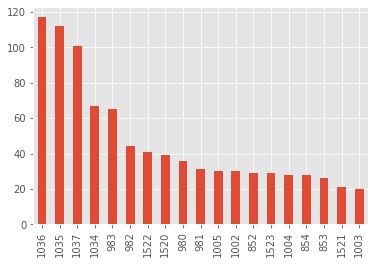

In [ ]:
# Gráfico de barras
df['LojaID'].value_counts(ascending=False).plot(kind='bar');

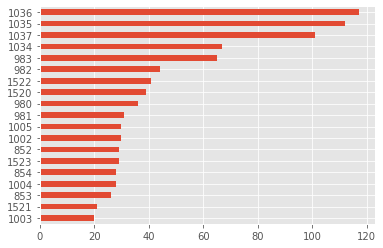

In [ ]:
# Grafico de barras horizontais
df['LojaID'].value_counts(ascending=True).plot(kind='barh');

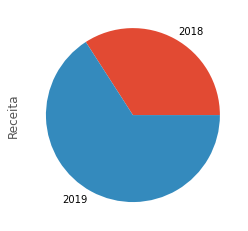

In [ ]:
# Gráfico de pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot(kind='pie');

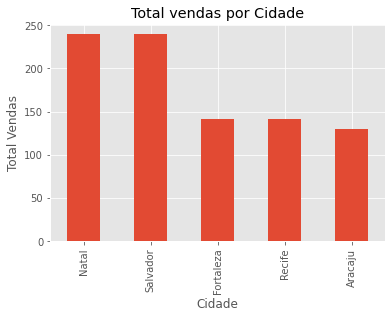

In [ ]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

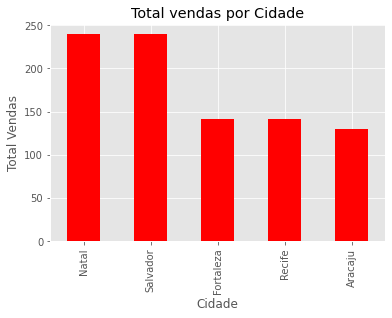

In [ ]:
# Alterando a cor
df['Cidade'].value_counts().plot.bar(title="Total vendas por Cidade", color='red')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

In [ ]:
# Alterando o estilo
plt.style.use('ggplot')

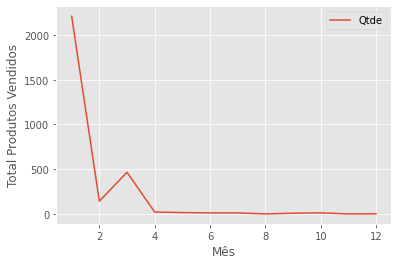

In [ ]:
from importlib import reload
plt=reload(plt)

df.groupby(df['mes_venda'])['Qtde'].sum().plot()
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

In [ ]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]

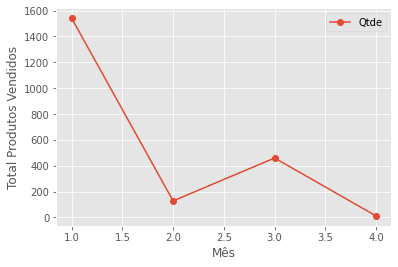

In [ ]:
# Total produtos vendidos por mes
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker='o')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

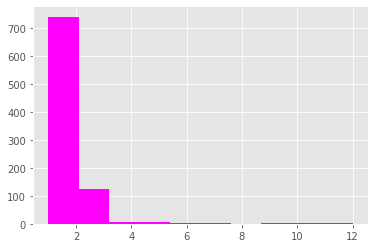

In [ ]:
# Histograma
plt.hist(df['mes_venda'], color='magenta');

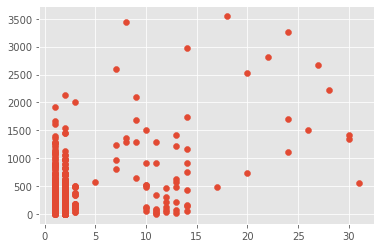

In [ ]:
plt.scatter(x=df_2019['dia_venda'], y = df_2019['Receita']);

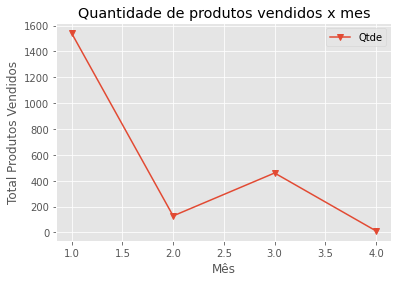

In [ ]:
# Salvando em png
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker='v')
plt.title('Quantidade de produtos vendidos x mes')
plt.xlabel("Mês")
plt.ylabel('Total Produtos Vendidos');
plt.legend()
plt.savefig('grafico QTDE x MES.png');